59


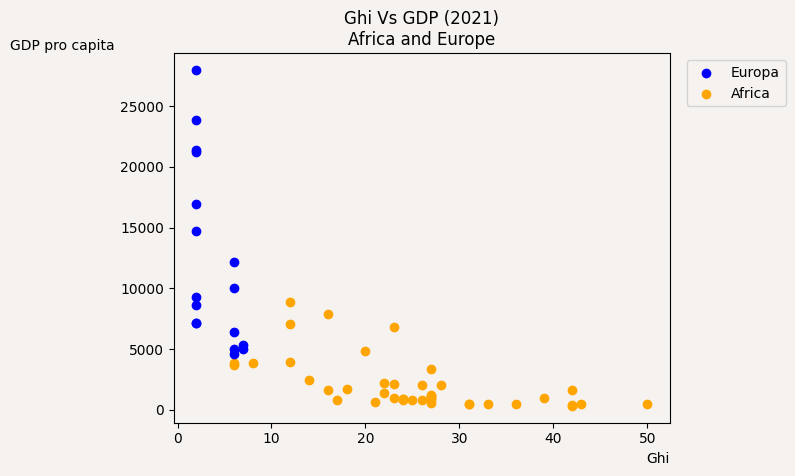

In [3]:
import matplotlib.pyplot as plt
m=0
f = open("/workspace/VS/DataSet/StatesOfEurope", "r")
line = f.readline()
europe = []
while line != "":
    europe.append(line[:len(line)-1])
    line = f.readline()
f.close()

f = open("/workspace/VS/DataSet/StatesOfAfrica", "r")
line = f.readline()
africa = []
while line != "":
    africa.append(line[:len(line)-1])
    line = f.readline()
f.close()

f = open("/workspace/VS/DataSet/GDP pro capita.csv", "r")
line = f.readline()
stati = []
while line != "":
    elments = line.split(",")
    if elments[0] not in stati:
        stati.append(elments[0])
    line = f.readline()
f.close()

fGdp = open("/workspace/VS/DataSet/GDP pro capita.csv", "r")
fGhi = open("/workspace/VS/DataSet/GlobalHungerIndex.csv", "r")
graphColor = "#f6f2ef"
plt.figure(facecolor = graphColor)
plt.axes(facecolor = graphColor)
lGdp = fGdp.readline()
elemGdp = lGdp.split(",")
lGhi = fGhi.readline()
elemGhi = lGhi.split(",")
while lGdp != "" and lGhi != "":
    if elemGhi[2] == "2021" and elemGhi[0] in stati :
        while True:
            if elemGdp[1] == "2021" and elemGhi[0] == elemGdp[0] :
                break
            lGdp = fGdp.readline()
            elemGdp = lGdp.split(",")
        # selezione colore e se e quali label mettere a legenda, suddiviso per aspettativa di vita
        #if  int(float(elemGhi[3])) < 50:
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#f03b20")
        #elif  50 <= int(float(elemGhi[3])) < 60:
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#fe9929")
        #elif  60 <= int(float(elemGhi[3])) < 70:
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#d9f0a3")
        #elif  70 <= int(float(elemGhi[3])) < 80:
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#78c679")
        #elif  80 <= int(float(elemGhi[3])):
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#006837")
        #

        # divide stati in base al continente di appartenenza(europa-africa) e al range di vita. Ogni fascia indicata attraveso un colore. Altri stati in grigio
        #if elemGhi[0] in europe:
        #    if 65 <= int(float(elemGhi[3])) < 75:
        #        plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#78c679")
        #    else:
        #        plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#006837")    
        #elif elemGhi[0] in africa:
        #    if int(float(elemGhi[3])) < 55:
        #        plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#f03b20")
        #    elif 55 <= int(float(elemGhi[3])) < 65:
        #        plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#fe9929")
        #    else:   
        #        plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#d9f0a3")
        #else:
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), color = 'gray')
        #

        # divide in europa e africa, ignora il resto
        if elemGhi[0] in europe:
            plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), color = "blue")
            m = m+1
        elif elemGhi[0] in africa:
            plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), color = "orange")    
            m = m+1
        #

        # evidenzia: gli stati europei ed aficani sovrapposti e gli stati con lifeExp sotto a 55
        #if (elemGhi[0] in europe or elemGhi[0] in africa) and (67 < int(float(elemGhi[3])) and int(float(elemGhi[3])) < 77):
        #    if elemGhi[0] in europe:
        #        plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "blue")
        #    else:
        #        plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "orange")    
        #elif (elemGhi[0] in europe or elemGhi[0] in africa) and int(float(elemGhi[3])) < 55:
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "red")    
        #elif elemGhi[0] in europe or elemGhi[0] in africa:
        #    plt.scatter(int(float(elemGhi[3])), int(float(elemGdp[3])), color = 'gray')
        #

        lGhi = fGhi.readline()
        elemGhi = lGhi.split(",")
    else:
        lGhi = fGhi.readline()
        elemGhi = lGhi.split(",")
fGdp.close()
fGhi.close() 
print(m)
#order = [0,2,3,4,5,6,11,12,13,14,17,19,22,23,24,26,29,1,7,10,16,18,20,28,8,9,15,21,27]
#handles, labels = plt.gca().get_legend_handles_labels() 
#plt.legend([handles[i] for i in order], [labels[i] for i in order], ncol = 3, bbox_to_anchor=(1.02, 1), loc='upper left', facecolor = graphColor)

plt.legend(['Europa', 'Africa'] ,ncol = 1, bbox_to_anchor=(1.02, 1), loc='upper left', facecolor = graphColor)
plt.title("Ghi Vs GDP (2021)\nAfrica and Europe")
plt.xlabel("Ghi", loc='right')
plt.ylabel("GDP pro capita", rotation='horizontal', loc = 'top')
plt.show()